In [5]:
"""
source: matplotlib tutorial
http://matplotlib.org/users/image_tutorial.html
"""

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.image import cm

import mnist_database

db = mnist_database.mnist_database('../data/mnist')

(images, labels) = db.get_training_data()

(images_training, labels_training) = (images, labels)
(images_testing, labels_testing) = db.get_testing_data()

In [11]:
# try to find lines in the digit
# not working: fitting function cannot be plotted. No idea why…

from math import *
from pylab import *
from scipy import optimize
from numpy import array

v = images_training[123][14*28:15*28]

Tx = linspace(0, len(v)-1, len(v))

fitfunc = lambda p, x: p[0] / (p[2] * sqrt(2*pi)) * exp(-(x-p[1])**2/(2*p[2]**2))
multifitfunc = lambda p, x: fitfunc(p[0:3],x) + fitfunc(p[3:6],x) + fitfunc(p[6:9],x)
errfunc = lambda p, x, y: y - fitfunc(p, x)

p0 = [127, len(Tx)/2, 1]
"""
print(p1)

plot(Tx, v, Tx, list(map(lambda xl: fitfunc(p1,xl), Tx)))

xlabel('center axis of the digit')
ylabel('greyscale')
title('cut through digit')
grid(True)
#savefig("diagram.png")
show()
"""

def convert_images(image_list):
    result = zeros((len(image_list),3*28))
    for image in range(len(image_list)):
        for line in range(28):
            v = image_list[image][line*28:(line+1)*28]
            # leastsq: error-function, starting estimate for parameters, extra arguments for error-function
            (p1, success) = optimize.leastsq(errfunc, p0[:], args=(Tx, v))
            result[image][line*3]   = p1[0]
            result[image][line*3+1] = p1[1]
            result[image][line*3+2] = p1[2]
    return result

c_images_testing = convert_images(images_testing)
c_images_training = convert_images(images_training)


/usr/lib/python3.4/site-packages/scipy/optimize/minpack.py:421: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


KeyboardInterrupt: 

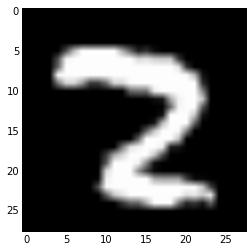

number of images: 60000


In [33]:
# view the first image of the dataset and print the number of images

imgplot = plt.imshow(images[28].reshape((28,28)), cmap=cm.gray)
plt.show()

print( 'number of images: %d' % len(images) )

In [8]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from classifier_test import classifier_test

test_bench = classifier_test( n_training_vectors=60000 )


In [9]:
result = test_bench.test_classifier(DecisionTreeClassifier())

print('correctly classified: %.2f' % (result[0] * 100) + '%')
print(result[1])

correctly classified: 87.85%
[[ 916    1    7    7   10   11   10    5    8    5]
 [   1 1093    7    4    3    6    8    4    7    2]
 [  11   16  881   30   12    8   15   26   24    9]
 [   9    5   31  858    7   43    5    6   23   23]
 [   4    2   10    7  867    8   16    4   25   39]
 [  13    5    6   42    8  743   22    6   27   20]
 [  19    5   10    8   15   22  850    2   23    4]
 [   4   14   21   15    8    4    2  929    8   23]
 [   8    7   34   43   19   29   13    7  789   25]
 [  13    3   11   18   41   13    5   19   27  859]]


In [1]:
from sklearn.svm import SVC

from classifier_test import classifier_test

test_bench = classifier_test( n_training_vectors=60000, n_testing_vectors=10000 )


In [7]:
import itertools
import pickle
from sklearn.tree import DecisionTreeClassifier

"""
classifiers_gini = map(lambda f: DecisionTreeClassifier(criterion='gini',
                                                        max_depth=15,
                                                        max_features=f),
                       range(400, 600))
"""

result_gini = []
i = 400
for classifier in classifiers_gini:
    result_gini.append(test_bench.test_classifier(classifier))
    print('entropy classifier with %d features' % i)
    i += 1

pickle.dump(result_gini, open('gini_400to600.pkl', 'wb'))




entropy classifier with 400 features
entropy classifier with 401 features
entropy classifier with 402 features
entropy classifier with 403 features
entropy classifier with 404 features
entropy classifier with 405 features
entropy classifier with 406 features
entropy classifier with 407 features
entropy classifier with 408 features
entropy classifier with 409 features
entropy classifier with 410 features
entropy classifier with 411 features
entropy classifier with 412 features
entropy classifier with 413 features
entropy classifier with 414 features
entropy classifier with 415 features
entropy classifier with 416 features
entropy classifier with 417 features
entropy classifier with 418 features
entropy classifier with 419 features
entropy classifier with 420 features
entropy classifier with 421 features
entropy classifier with 422 features
entropy classifier with 423 features
entropy classifier with 424 features
entropy classifier with 425 features
entropy classifier with 426 features
e

In [6]:
print(result_entr)

[(0.88319999999999999, array([[ 909,    3,    8,    7,    4,   11,   11,    9,    9,    9],
       [   0, 1099,   10,    3,    3,    4,    3,    3,    9,    1],
       [  14,   10,  878,   35,   10,   15,   14,   26,   27,    3],
       [   2,    6,   26,  868,    4,   38,    6,   17,   26,   17],
       [   3,    5,   10,   10,  842,   13,   11,    9,   19,   60],
       [   9,    7,   10,   35,   10,  753,   23,    7,   17,   21],
       [   6,    5,    7,    6,   16,   18,  885,    1,   11,    3],
       [   0,    8,   19,   17,   14,    6,    1,  928,   11,   24],
       [   8,    6,   35,   30,   23,   23,   18,   13,  789,   29],
       [   9,    4,    6,   19,   42,   20,    5,   10,   13,  881]], dtype=int32)), (0.88470000000000004, array([[ 929,    1,    7,    4,    3,   17,   11,    2,    3,    3],
       [   2, 1103,    4,    5,    1,    3,    3,    4,    9,    1],
       [  14,    5,  897,   21,   19,    3,   17,   23,   25,    8],
       [   7,    3,   20,  858,    8,   43

In [4]:
from numpy import zeros, int32


class mnistdb_classifier_test:
    def __init__(self,
                 learning_implementation,
                 training_vectors=len(images_training),
                 testing_vectors=len(images_testing)
                ):
        self.learning_implementation = learning_implementation
        self.trv = training_vectors
        self.tsv = testing_vectors
        self.hits = zeros((10,10), dtype=int32)
    
    def train(self):
        self.learning_implementation.fit(images_training[:self.trv],
                                         labels_training[:self.trv])
        return
    
    def test(self):
        for (t, sol) in zip(images_testing[:self.tsv],
                            labels_testing[:self.tsv]):
            self.hits[sol][self.learning_implementation.predict(t)] += 1
        return
    
    def get_precision(self):
        return sum([self.hits[d][d] for d in range(len(self.hits))]) / float(self.tsv)
    
    def stats(self):
        return self.hits


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import cm
import numpy

from sklearn.tree import DecisionTreeClassifier

def test_decision_tree(optimization='entropy',
                       max_depth_range=range(10,20),
                       max_features_range=range(10,20),
                       training_vectors=60000
                      ):
    
    result = []
    
    for depth in max_depth_range:
        current_depth_results = []
        
        for features in max_features_range:
            m = mnistdb_classifier_test(
                DecisionTreeClassifier(criterion=optimization,
                                       max_depth=depth,
                                       max_features=features),
                training_vectors=training_vectors
            )
            m.train()
            m.test()
            hit_rate = m.get_precision()
            
            print('depth %d, features %d: %.3f' % (depth, features, hit_rate*100) +
                  '% classified correctly')
            current_depth_results.append(hit_rate)

        print('')
        result.append(current_depth_results)
    
    return result

print('calculating trees using the Gini index')
result_gini = test_decision_tree(optimization='gini')
print(result_gini)

print('\n')

print('calculating trees using the entropy:')
result_entropy = test_decision_tree(optimization='entropy')
print(result_entropy)


In [15]:
import pickle

name = '40x80'
#name = 'depth15'

result_gini = pickle.load( open('gini_%s.pkl' % name, 'rb') )
result_entropy = pickle.load( open('entropy_%s.pkl' % name, 'rb') )


In [14]:
print(result_gini)

[[0.5354, 0.601, 0.6865, 0.6977, 0.7405, 0.7663, 0.7639, 0.7936, 0.8035, 0.8001, 0.7979, 0.8016, 0.8161, 0.8039, 0.818, 0.8176, 0.8278, 0.8323, 0.8202, 0.8348, 0.8361, 0.8269, 0.8364, 0.8328, 0.8437, 0.8277, 0.8355, 0.8366, 0.8437, 0.8376, 0.8465, 0.8523, 0.8509, 0.8482, 0.8454, 0.8547, 0.8476, 0.8458, 0.8558, 0.8519, 0.8481, 0.8503, 0.8521, 0.8566, 0.8579, 0.8501, 0.8547, 0.8514, 0.8501, 0.8495, 0.8563, 0.8491, 0.8627, 0.8593, 0.8588, 0.8495, 0.8645, 0.8577, 0.8603, 0.8553, 0.8601, 0.8619, 0.8613, 0.8673, 0.8655, 0.8627, 0.8627, 0.8656, 0.8636, 0.8695, 0.8673, 0.871, 0.8608, 0.8642, 0.8649, 0.8565, 0.8708, 0.8592, 0.8644, 0.8679, 0.8634, 0.8671, 0.8674, 0.8744, 0.8672, 0.8653, 0.8719, 0.8613, 0.8655, 0.8656, 0.8604, 0.8693, 0.8668, 0.8712, 0.8602, 0.8679, 0.8663, 0.8726, 0.8646, 0.8691, 0.8665, 0.8703, 0.868, 0.8698, 0.8763, 0.8636, 0.8658, 0.8595, 0.8781, 0.8641, 0.8679, 0.8715, 0.8684, 0.8697, 0.8717, 0.8732, 0.8659, 0.8742, 0.8683, 0.875, 0.8771, 0.8693, 0.8716, 0.8714, 0.8691, 0.8

Gini Index:


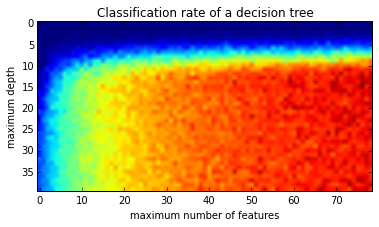


Entropy:


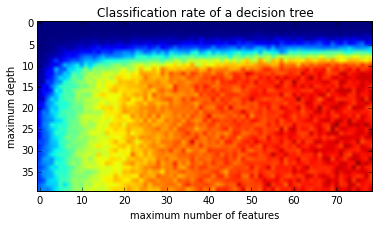

In [18]:
from pylab import *
from matplotlib.image import cm

def plot_color_diagram( result_matrix, exponent=1 ):
    if exponent != 1:
        result_matrix = [[x**exponent for x in line] for line in result_matrix]
    
    xlabel('maximum number of features')
    ylabel('maximum depth')
    title('Classification rate of a decision tree')
    
    plt.imshow(result_matrix)
    plt.show()

print('Gini Index:')
plot_color_diagram(result_gini, exponent=8)
savefig('dec_tree_gini.png')
print('')
print('Entropy:')
plot_color_diagram(result_entropy, exponent=8)
savefig('dec_tree_entropy.png')

In [133]:
gini_max = 0.0
entropy_max = 0.0

import itertools

def matr_max(matr):
    max_val = 0
    ind = -1
    n = 0
    for value in itertools.chain(*matr):
        if value > max_val:
            ind = n
            max_val = value
        n += 1

    max_pos = (ind // len(matr[0]), ind % len(matr[0]))
    
    return (max_val, max_pos[0], max_pos[1])


(entropy_max, e_depth, e_features) = matr_max(result_entropy)
print('entropy: max: %.3f (depth: %d, features: %d)' % (entropy_max, e_depth, e_features))

(gini_max, g_depth, g_features) = matr_max(result_gini)
print('gini: max: %.3f (depth: %d, features: %d)' % (gini_max, g_depth, g_features))


entropy: max: 0.893 (depth: 0, features: 307)
gini: max: 0.886 (depth: 0, features: 332)


In [25]:
# store aquired data with pickle module, s.t. it can be easily loaded again

import pickle

name = 'test'

with open('gini_%s.pkl' % name, 'w') as gini_f:
    pickle.dump(result_gini, gini_f)
    gini_f.close()

with open('entropy_%s.pkl' % name, 'w') as entropy_f:
    pickle.dump(result_entropy, entropy_f)
    entropy_f.close()


In [29]:
import pickle

entropy_result = pickle.load( open('entropy_depth15.pkl', 'rb') )[0]
gini_result = pickle.load( open('gini_depth15.pkl', 'rb') )[0]

entropy_ext = tuple(zip(*pickle.load( open('entr_400to600.pkl', 'rb') )))[0]
gini_ext = tuple(zip(*pickle.load( open('gini_400to600.pkl', 'rb') )))[0]

entropy_result.extend(entropy_ext)
gini_result.extend(gini_ext)


In [30]:
print(len(result_gini))
print(len(result_gini))

599
599


--------------------
Gini Index:
--------------------


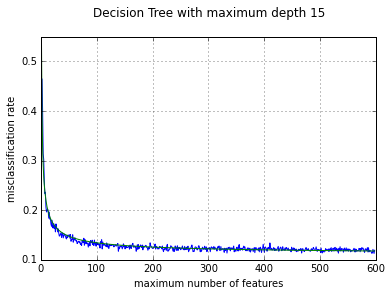

estimated parameters:
	exponent: 	0.620599
	factor: 	0.429504
	constant: 	0.109628
=> classification rate approaches a limit of about 0.890372


--------------------
Entropy:
--------------------


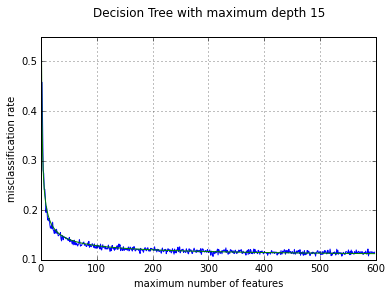

estimated parameters:
	exponent: 	0.619433
	factor: 	0.415640
	constant: 	0.104500
=> classification rate approaches a limit of about 0.895500


In [28]:
%matplotlib inline

from pylab import *
from scipy import optimize


def fit_vector_with_hyperbola(v):
    Tx = linspace(1, len(v)-1, len(v))
    tX = list(map(lambda x: 1-v[int(x-1)], Tx))

    fitfunc = lambda p, x: 1 / x**p[0] * p[1] + p[2]
    errfunc = lambda p, x, y: y - fitfunc(p, x)

    p0 = [1, 1, 0.1]
    # leastsq: error-function, starting estimate for parameters, extra arguments for error-function
    (p1, success) = optimize.leastsq(errfunc, p0, args=(Tx, tX))

    plot(Tx, tX, Tx, list(map(lambda xl: fitfunc(p1,xl), Tx)))
    
    xlabel('maximum number of features')
    ylabel('misclassification rate')
    title('Decision Tree with maximum depth 15\n')
    grid(True)
    #savefig("diagram.png")
    show()

    # print the result of the estimated parameters
    print('estimated parameters:')
    print('\texponent: \t%f' % p1[0])
    print('\tfactor: \t%f' % p1[1])
    print('\tconstant: \t%f' % p1[2])
    print('=> classification rate approaches a limit of about %f' % (1-p1[2]))

print(20*'-')
print('Gini Index:')
print(20*'-')

fit_vector_with_hyperbola(result_gini)

print('')
print('')
print(20*'-')
print('Entropy:')
print(20*'-')

fit_vector_with_hyperbola(result_entropy)


In [4]:
# the best classifier I have found

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=15,
                                    max_features=308)
classifier.fit(images_training, labels_training)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=308, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

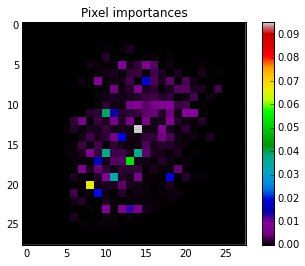

In [9]:
# render the pixel importances

import matplotlib.pyplot as plt
from matplotlib.image import cm

plt.title('Pixel importances')
plt.imshow(classifier.feature_importances_.reshape((28,28)),
           cmap=cm.spectral, interpolation='none')

clbar = plt.colorbar()
plt.show()

In [ ]:
# render the decision tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

try:
    import pydot
    
    dot_data = StringIO() 
    export_graphviz(classifier,
                    out_file=dot_data) 
    graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
    graph.write_pdf("decision-tree.pdf")
    print('created PDF-file')

except ImportError:
    # ImportError: pydot is not existing (probably working in python3)
    with open("/home/raphael/Dokumente/MLlab/data/one-feature-tree.dot", 'w') as f:
        f = export_graphviz(classifier, out_file=f)
    print('created dot-file')


In [28]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier_test = mnistdb_classifier_test(RandomForestClassifier())
forest_classifier_test.train()
forest_classifier_test.test()


In [34]:
print( forest_classifier_test.stats() )
print( forest_classifier_test.get_precision() )

[[ 964    0    0    1    0    3    7    1    4    0]
 [   0 1119    7    4    0    1    1    1    2    0]
 [  10    2  983    7    3    3    5   12    6    1]
 [   3    3   13  959    1   12    2    7    7    3]
 [   2    2    5    1  942    0    6    2    3   19]
 [   4    2    6   30    3  823    7    4    9    4]
 [   9    3    3    2    7    9  917    0    7    1]
 [   2    8   23    6    9    1    0  964    4   11]
 [   4    1    6   22   12   17    8    8  889    7]
 [  10    6    2   17   21    6    1    5   10  931]]
0.9491


In [48]:
from multiprocessing import Pool

def evaluate_classifier(m_classifier):
    m_classifier.train()
    m_classifier.test()
    return m_classifier.get_precision()

def test_random_forests_estimators(n_estimators_range=range(1, 20), processes=1):
    classifiers = []
    pool = Pool(processes=processes)
    
    for n_estimators in n_estimators_range:
        classifiers.append(mnistdb_classifier_test(RandomForestClassifier(
                                           n_estimators=n_estimators,
                                           criterion='entropy'
                                       )
                                )
        )
    
    return pool.map(evaluate_classifier, classifiers)


def test_random_forests(n_estimators_range=range(1, 20),
                        criterion='entropy',
                        max_depth_range=range(15, 16),
                        max_features=range(308, 309),
                        processes=1
                       ):
    classifiers = []
    pool = Pool(processes=processes)
    
    for n_estimators in n_estimators_range:
        for max_depth in max_depth_range:
            for max_features in max_features_range:
                classifiers.append(mnistdb_classifier_test(
                                       RandomForestClassifier(
                                           n_estimators=n_estimators,
                                           criterion=criterion,
                                           max_depth=max_depth,
                                           max_features=max_features
                                       )
                                   )
                                  )
    
    return pool.map(evaluate_classifier, classifiers)


In [49]:
import pickle

pickle.dump( test_random_forests_estimators( range(1,41), 4 ), open('entropy_random_forest.pkl', 'w') )


1 estimators: 0.837100% correctly classified
4 estimators: 0.914600% correctly classified
7 estimators: 0.940500% correctly classified
10 estimators: 0.953500% correctly classified
2 estimators: 0.835600% correctly classified5 estimators: 0.923500% correctly classified8 estimators: 0.943800% correctly classified11 estimators: 0.952300% correctly classified



3 estimators: 0.885800% correctly classified6 estimators: 0.932000% correctly classified9 estimators: 0.949900% correctly classified12 estimators: 0.953000% correctly classified



13 estimators: 0.955100% correctly classified16 estimators: 0.959500% correctly classified19 estimators: 0.957500% correctly classified22 estimators: 0.960600% correctly classified



14 estimators: 0.955400% correctly classified17 estimators: 0.956900% correctly classified20 estimators: 0.960000% correctly classified23 estimators: 0.962700% correctly classified



15 estimators: 0.955300% correctly classified18 estimators: 0.959800% correctly classifie

In [11]:
import pickle

entropy_n_estimator_list = pickle.load( open('entropy_random_forest.pkl') )


In [12]:
from pylab import *

Tx = linspace(1, 40, 40)
Ty = map(lambda x: entropy_n_estimator_list[int(x)], Tx)

plot(Tx, Ty)
show()

IndexError: list index out of range